# HepMC

In [1]:
import pyhepmc
print(pyhepmc.__version__)

2.13.4


In [2]:
def rec_track(p, nchildren=-1):
    ps = [p]
    if len(p.children)==0 or (nchildren >0 and len(p.children) != nchildren):
        return ps
    for pss in p.children:
        ps = ps + rec_track(pss,nchildren)
    return ps

In [3]:
with pyhepmc.open("example.HepMC") as f:    
    for event in f:
        print("incoming:")
        for p in event.particles:
            if p.status == 21:
                print(p, p.id)
                print([pp.id for pp in rec_track(p,1)])
        print("outgoing:")
        for p in event.particles:
            if p.status == 23:
                print(p,p.id)
                print([pp.id for pp in rec_track(p,1)])
            
        break

incoming:
GenParticle(FourVector(0, 0, -117, 117), mass=0, pid=3, status=21) 187
[187]
GenParticle(FourVector(0, 0, 183, 183), mass=0, pid=2, status=21) 188
[188]
outgoing:
GenParticle(FourVector(-33.6, -15, 133, 138), mass=1.90735e-06, pid=2, status=23) 189
[189, 192]
GenParticle(FourVector(51.1, 18.9, -106, 119), mass=1.3487e-06, pid=3, status=23) 190
[190, 361, 505, 592, 647, 648]
GenParticle(FourVector(-17.5, -3.92, 39, 43), mass=4.76837e-07, pid=22, status=23) 191
[191, 362, 506, 593]


In [4]:
event

<GenEvent momentum_unit=1, length_unit=0, event_number=0, particles=819, vertices=477, run_info=GenRunInfo(tools=[], weight_names=['Default', 'W1', 'W2'], attributes={})>

In [13]:
import pyfeyn2.interface.hepmc as hepmc

from pyfeyn2.render.latex.tikzfeynman import TikzFeynmanRender
from pyfeyn2.render.pyx.pyxrender import PyxRender
from pyfeyn2.feynmandiagram import FeynML

from pyfeyn2.auto.bend import auto_bend
from pyfeyn2.auto.label import auto_label
from pyfeyn2.auto.position import feynman_adjust_points,remove_unnecessary_vertices

fd = hepmc.event_to_feynman(event)
fd.legs[0].with_xy(7,-7).with_external(r"$\textcolor{green}{p}$").style.color = "green"
fd.legs[1].with_xy(-6,6).with_external(r"$\textcolor{green}{p}$").style.color = "green"

props=[]
for prop in fd.propagators:
    if prop.type == "meson" :
        prop.type = "line"
    if prop.type == "baryon":
        prop.type = "fermion"
    if prop.type == "anti baryon":
        prop.type = "anti fermion"
    if prop.id in ["Propagator" + str(ii) for ii in [
        187,
        188,
        189, 192,
        190, 361, 505, 592, 647, 648,
        191, 362, 506, 593]]:
        prop.style.color="red"
        props += [prop]
        
for p in props:
    fd.remove_propagator(p)
fd.propagators += props 

for prop in fd.legs:
    if prop.type == "meson" :
        prop.type = "line"
    if prop.type == "baryon":
        prop.type = "fermion"
    if prop.type == "anti baryon":
        prop.type = "anti fermion"
    if prop.id in ["Leg" + str(ii) for ii in [
        187,
        188,
        189, 192,
        190, 361, 505, 592, 647, 648,
        191, 362, 506, 593]]:
        prop.style.color="blue"
        if prop.pdgid == 22:
            prop.with_xy(0,6).with_external(r"$\textcolor{blue}{\gamma}$")




d = remove_unnecessary_vertices(fd)
d = feynman_adjust_points(d,size=15)
auto_bend(d)
#auto_label(d.propagators)
#auto_label(d.legs)
#print(d)
t = TikzFeynmanRender(d)
#print(t.get_src())
#t.src_diag

/tmp/ipykernel_18770/554642304.py:11: DeprecatedWarning: hepmc_event_to_feynman is deprecated as of 2.2.6.
  fd = hepmc.event_to_feynman(event)


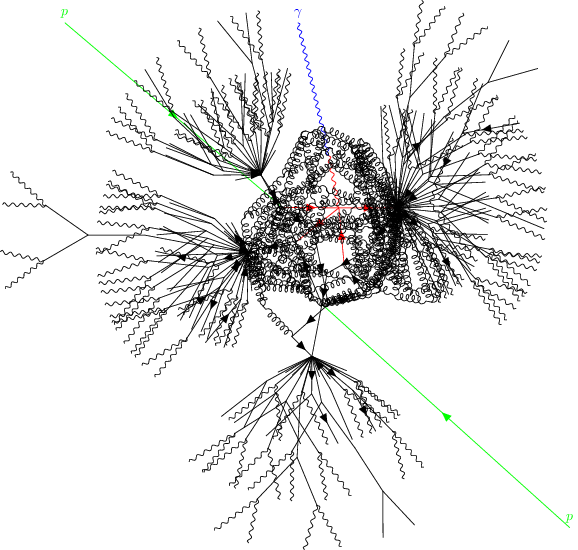

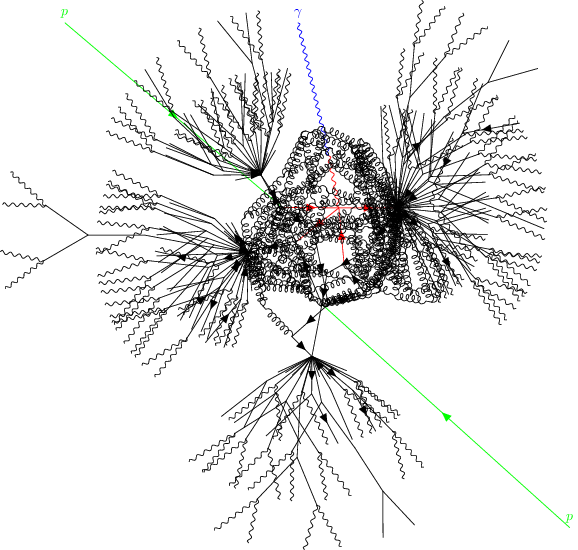

In [14]:
t.render(show=True,file="render.pdf")